## 데이터

In [1]:
import pandas

In [2]:
from sklearn.decomposition import PCA

In [3]:
import seaborn

In [4]:
wine = pandas.read_csv('wine.csv')

In [5]:
wine.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,Color intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
wine.shape

(178, 14)

## PCA

In [6]:
pca = PCA(n_components=2) 

In [7]:
score = pca.fit_transform(wine.iloc[:, 1:])

In [10]:
pca.explained_variance_ratio_  # 설명된 분산의 비율 = R 제곱

array([0.99809123, 0.00173592])

### 시각화

표 형태로 변환하고, 컬럼 이름을 Comp1, Comp2라고 붙인다.

In [11]:
score_df = pandas.DataFrame(score, columns=['Comp1', 'Comp2'])

wine의 종류(Class) 정보를 가져와서 붙인다.

In [73]:
score_df['Class'] = wine['Class']

와인 종류별로 색깔을 달리해서 2차원에 그려본다.

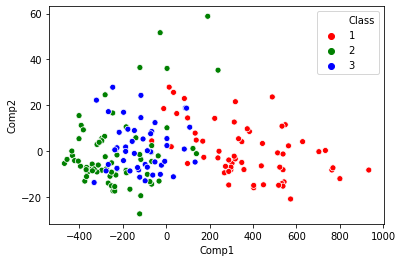

In [74]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

## 표준화 후에 PCA

### 표준화

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scale = StandardScaler()

In [16]:
x = scale.fit_transform(wine.iloc[:, 1:])

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### PCA

In [18]:
sp = PCA(n_components=2)

In [19]:
score2 = sp.fit_transform(x)  # fit: 파라미터 추정(컴포넌트 찾기)
                              # transform: 변환 -> 축소된 차원 점수

위의 과정은 다음과 같이 나눠서 할 수도 있다. 만약 새로운 와인 데이터를 구했다면 transform만 실시

In [19]:
sp.fit(x)
score2 = sp.transform(x)

In [20]:
sp.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [22]:
p = PCA()

In [23]:
p.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

설명된 분산이 1이상인 축만 남긴다. 아래의 경우에는 3개만 남기면됨.

In [24]:
p.explained_variance_  # ratio는 이것을 전체 분산으로 나눈 것

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [25]:
score_df = pandas.DataFrame(score2, columns=['Comp1', 'Comp2'])

In [26]:
score_df['Class'] = wine['Class']

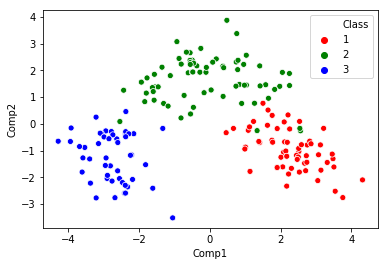

In [27]:
seaborn.scatterplot('Comp1', 'Comp2', hue='Class', data=score_df, palette=['r', 'g', 'b'])

## 1차원 시각화

In [58]:
a = numpy.array([1, 2, 3, 4, 5])
b = numpy.array([10, 20, 30, 40, 50])
numpy.extract(a > 3, b)

array([40, 50])

In [65]:
c = 2
f'Class = {c}'

'Class = 2'

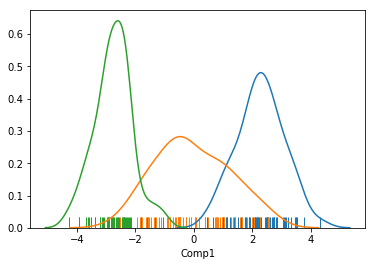

In [63]:
for c in range(1, 4):
    d = score_df.query(f'Class == {c}')['Comp1']
    seaborn.distplot(d, rug=True, hist=False) 

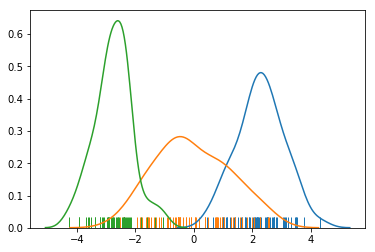

In [57]:
# c는 1부터 3까지
for c in range(1, 4):
    
    # wine의 Class 컬럼에 따라 score를 뽑아낸다
    d = numpy.extract(wine['Class'] == c, score2[:, 0])
    
    # 해당 score의 밀도를 시각화한다
    seaborn.distplot(d, rug=True, hist=False)

In [29]:
from numpy.random import normal

In [35]:
import numpy

In [47]:
vs = []
for _ in range(100):
    x = normal(0, 1, 30)
    v = numpy.sum((x - x.mean()) ** 2) / 29
    vs.append(v)

In [48]:
numpy.mean(vs)

0.9822398349514971

### 실습: hsb2.csv

In [66]:
hsb = pandas.read_csv('hsb2.csv')

hsb에서 read 	write 	math 	science 	socst 다섯 과목을 PCA해서 2차원에 성별(female)에 따라 시각화 해보세요.

In [68]:
pca = PCA(n_components=2) 

In [71]:
hsb[['read', 'write', 'math', 'science', 'socst']]

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61
2,44,33,54,58,31
3,63,44,47,53,56
4,47,52,57,53,61
5,44,52,51,63,61
6,50,59,42,53,61
7,34,46,45,39,36
8,63,57,54,58,51
9,57,55,52,50,51


In [72]:
score = pca.fit_transform(hsb.iloc[:, 6:])

In [74]:
pca.explained_variance_ratio_

array([0.67506211, 0.11941715])

In [75]:
score_df = pandas.DataFrame(score, columns=['Comp1', 'Comp2'])

In [77]:
score_df['female'] = hsb['female']

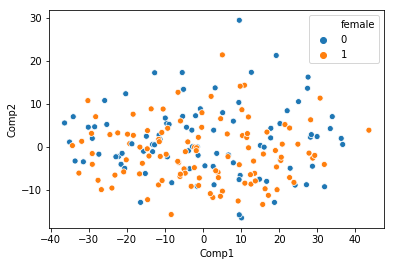

In [78]:
seaborn.scatterplot('Comp1', 'Comp2', hue='female', data=score_df)

## NMF

In [82]:
from sklearn.decomposition import NMF

In [83]:
nmf = NMF(n_components=2)

`hsb.iloc[:, 6:]`와 `hsb[['read', 'write', 'math', 'science', 'socst']]`는 똑같다.

In [90]:
score = nmf.fit_transform(hsb[['read', 'write', 'math', 'science', 'socst']])

In [91]:
score

array([[2.15599754, 1.48927056],
       [2.85954204, 1.31813185],
       [2.63526129, 0.01331062],
       [2.41169948, 1.24293257],
       [2.40152527, 1.40153284],
       [2.51101483, 1.2374375 ],
       [2.24673453, 1.55802667],
       [1.96985854, 0.72274037],
       [2.79968423, 0.99955841],
       [2.49548846, 1.14636001],
       [2.40165354, 1.41976959],
       [2.75272354, 1.35644502],
       [3.0500228 , 1.64236896],
       [2.78026751, 0.87398699],
       [1.83667782, 1.72449973],
       [2.08390692, 1.3291156 ],
       [2.2901941 , 1.30705772],
       [2.77364764, 1.1430705 ],
       [2.85900503, 1.46173061],
       [2.56013813, 0.73793068],
       [2.73771325, 0.51979583],
       [3.34713456, 1.20817863],
       [2.25434773, 1.16403895],
       [2.73497581, 1.265496  ],
       [1.8739271 , 1.10088126],
       [1.97394618, 0.45570394],
       [2.97696363, 1.50461291],
       [2.72939589, 0.75772313],
       [1.9690774 , 1.04228044],
       [2.54138726, 0.58912882],
       [2.

In [85]:
nmf.reconstruction_err_

143.12732842523727

In [92]:
nmf.components_

array([[17.10271518, 16.15759752, 18.78260808, 21.04648333, 10.11797503],
       [ 8.97102696, 11.34934325,  5.56484605,  0.        , 24.19692873]])

In [93]:
hsb.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [102]:
original = hsb[['read', 'write', 'math', 'science', 'socst']].values
recon = score @ nmf.components_

In [106]:
numpy.sqrt(((original - recon) ** 2).sum())

143.12732842523727

### 실습: med.csv

In [109]:
med = pandas.read_csv('med.csv')

In [112]:
med.dropna(inplace=True)  # med에서 빈 값이 있는 행을 없애고 다시 med에 덮어쓴다

In [113]:
nmf = NMF(n_components=2)

In [114]:
score = nmf.fit_transform(med.iloc[:, 4:11])

In [116]:
nmf.components_

array([[ 1.47150289,  1.45637616,  3.00656129,  4.36957985,  2.56738169,
         4.53278833, 14.49959593],
       [ 0.37098128,  0.47184245,  4.13092151,  0.40023626,  1.99304915,
         0.        ,  6.45815307]])

In [117]:
test = pandas.read_csv('test.csv')

In [119]:
test.head()

,Visual,Cubes,Lozenges,Comprehension,Completion,Word,Addition,Counting,Curve
0,23,19,4,10,17,10,69,82,156
1,33,22,17,8,17,10,65,98,195
2,34,24,22,11,19,19,50,86,228
3,29,23,9,9,19,11,114,103,144
4,16,25,10,8,25,24,112,122,160


In [139]:
scale = StandardScaler()
x = scale.fit_transform(test)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [141]:
pca = PCA()
pca.fit(x)

In [143]:
pca.explained_variance_

array([3.6397564 , 1.5731283 , 1.25920295, 0.71169667, 0.53641336,
       0.42424778, 0.36053782, 0.30005605, 0.25746066])

In [133]:
nmf = NMF(n_components=2)

In [134]:
score = nmf.fit_transform(test)

In [135]:
nmf.components_

array([[ 6.84935194,  5.16595838,  3.86664533,  2.15869614,  3.90643328,
         3.79105795, 10.95911365, 18.4375353 , 46.22062013],
       [ 0.51721999,  1.73402291,  0.        ,  0.54210008,  1.45935535,
         0.87766053, 27.27022047, 19.94501396,  0.11962849]])

## 요인 분석

### 설치

In [144]:
!pip install factor_analyzer

### 탐색적 요인 분석

In [147]:
test = pandas.read_csv('test.csv')

In [148]:
test.head() 

,Visual,Cubes,Lozenges,Comprehension,Completion,Word,Addition,Counting,Curve
0,23,19,4,10,17,10,69,82,156
1,33,22,17,8,17,10,65,98,195
2,34,24,22,11,19,19,50,86,228
3,29,23,9,9,19,11,114,103,144
4,16,25,10,8,25,24,112,122,160


### 요인 수

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
pc = PCA()

In [151]:
std = StandardScaler()
x = std.fit_transform(test)

C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\eupho\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [152]:
pc.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [153]:
pc.explained_variance_

array([3.6397564 , 1.5731283 , 1.25920295, 0.71169667, 0.53641336,
       0.42424778, 0.36053782, 0.30005605, 0.25746066])

### 요인분석

In [155]:
from factor_analyzer import FactorAnalyzer

In [156]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation=None)

In [157]:
fa.fit(test)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='ml', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)

In [159]:
fa.get_communalities()

array([0.50140201, 0.26002398, 0.46474055, 0.75900255, 0.69790073,
       0.6784225 , 0.61166782, 0.68312044, 0.54357143])

In [297]:
fa.get_uniquenesses()

array([0.49859799, 0.73997602, 0.53525945, 0.24099745, 0.30209927,
       0.3215775 , 0.38833218, 0.31687956, 0.45642857])

### 회전

In [161]:
fa = FactorAnalyzer(n_factors=3, method='ml', rotation='promax')

In [162]:
fa.fit(test)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='ml', n_factors=3, rotation='promax', rotation_kwargs={},
        use_smc=True)

In [163]:
fa.loadings_

array([[ 0.03193199,  0.029854  ,  0.67892039],
       [-0.01848066, -0.0542345 ,  0.53893002],
       [ 0.0583664 , -0.06384159,  0.67698673],
       [ 0.86067724, -0.04487587,  0.04805298],
       [ 0.81684285,  0.09133061, -0.02868583],
       [ 0.80826887, -0.04901536,  0.05958152],
       [ 0.12404526,  0.82272515, -0.25715235],
       [-0.1595777 ,  0.80168541,  0.14106258],
       [ 0.03069059,  0.46076509,  0.39471089]])

In [164]:
fa.phi_  # 요인간 상관 행렬 

array([[1.        , 0.30959555, 0.4794411 ],
       [0.30959555, 1.        , 0.42381187],
       [0.4794411 , 0.42381187, 1.        ]])

### 확인적 요인분석

In [165]:
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser

#### 모형

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
std_test = pandas.DataFrame(x, columns=test.columns)

In [190]:
model_dict = {
    '시각': ['Visual', 'Cubes', 'Lozenges'],
    '언어': ['Comprehension', 'Completion', 'Word'],
    '수리': ['Addition', 'Counting', 'Curve']
} 

In [185]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(
    std_test,
    model_dict)

#### 분석

In [186]:
cfa = ConfirmatoryFactorAnalyzer(model_spec)

In [187]:
cfa.fit(std_test)

C:\Users\eupho\Anaconda3\lib\site-packages\factor_analyzer\confirmatory_factor_analyzer.py:733: UserWarning: The optimization routine failed to converge: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  'to converge: {}'.format(str(res.message)))


ConfirmatoryFactorAnalyzer(bounds=None, disp=True, impute='median',
              is_cov_matrix=False, max_iter=200, n_obs=145,
              specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x000002921644DDA0>,
              tol=None)

In [188]:
cfa.loadings_

array([[ 0.67741421,  0.        ,  0.        ],
       [ 0.39017586,  0.        ,  0.        ],
       [ 0.54599675,  0.        ,  0.        ],
       [ 0.62916007,  0.        , -0.08202252],
       [ 0.        ,  0.81860992,  0.        ],
       [ 0.        ,  0.78209841,  0.        ],
       [ 0.        ,  0.28783963,  0.        ],
       [ 0.        ,  0.        ,  0.59603189],
       [ 0.        ,  0.        ,  0.89905862]])

In [189]:
cfa.factor_varcovs_  # 요인간 상관

array([[1.        , 0.85574514, 0.71564641],
       [0.85574514, 1.        , 0.47834029],
       [0.71564641, 0.47834029, 1.        ]])

#### 적합도

In [182]:
cfa.aic_

3351.04674765519

In [183]:
cfa.bic_

3502.860168518639

## 다차원척도법 (MDS)

### 데이터 준비

In [1]:
import numpy

In [3]:
import pandas

- 스타벅스
- 할리스
- 이디야
- 투썸

In [32]:
df = pandas.DataFrame(
    [
        ['블루보틀', '스타벅스', 3.3],
        ['블루보틀', '할리스', 4.5],
        ['블루보틀', '이디야', 5],
        ['블루보틀', '투썸', 5],
        ['스타벅스', '할리스', 3.5],
        ['스타벅스', '이디야', 4.5],
        ['스타벅스', '투썸', 2.2],
        ['할리스', '이디야', 3.3],
        ['할리스', '투썸', 1.2],
        ['이디야', '투썸', 4.8],
    ])

In [33]:
df

,0,1,2
0,블루보틀,스타벅스,3.3
1,블루보틀,할리스,4.5
2,블루보틀,이디야,5.0
3,블루보틀,투썸,5.0
4,스타벅스,할리스,3.5
5,스타벅스,이디야,4.5
6,스타벅스,투썸,2.2
7,할리스,이디야,3.3
8,할리스,투썸,1.2
9,이디야,투썸,4.8


In [34]:
distance = numpy.zeros((5, 5))  # 가로 4, 세로 4로 모두 0인 빈 행렬
product_id = {'스타벅스': 0, '할리스': 1, '이디야': 2, '투썸': 3, '블루보틀': 4}

In [37]:
for i, row in df.iterrows():  # df에서 한 행씩 처리를 합니다
    p1 = row[0]
    i1 = product_id[p1]
    
    p2 = row[1]
    i2 = product_id[p2]
    
    distance[i1, i2] = row[2]    

In [38]:
p1

'이디야'

In [39]:
distance

array([[0. , 3.5, 4.5, 2.2, 0. ],
       [0. , 0. , 3.3, 1.2, 0. ],
       [0. , 0. , 0. , 4.8, 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [3.3, 4.5, 5. , 5. , 0. ]])

In [40]:
distance = distance + distance.T

In [41]:
distance

array([[0. , 3.5, 4.5, 2.2, 3.3],
       [3.5, 0. , 3.3, 1.2, 4.5],
       [4.5, 3.3, 0. , 4.8, 5. ],
       [2.2, 1.2, 4.8, 0. , 5. ],
       [3.3, 4.5, 5. , 5. , 0. ]])

### 분석

In [42]:
from sklearn.manifold import MDS

In [43]:
mds = MDS(metric=False, dissimilarity='precomputed')

In [44]:
pos = mds.fit_transform(distance)

In [45]:
pos

array([[ 0.22157785,  0.03448975],
       [-0.161733  , -0.20482913],
       [-0.55438883,  0.08684926],
       [ 0.30758178, -0.42896098],
       [ 0.20108948,  0.497828  ]])

### 시각화

In [46]:
import seaborn

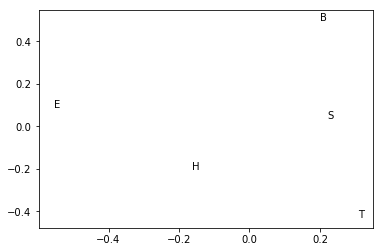

In [47]:
plt = seaborn.scatterplot(pos[:, 0], pos[:, 1], color='white')
for i, label in enumerate(['S', 'H', 'E', 'T', 'B']):
    plt.text(pos[i, 0], pos[i, 1], label)